# Cross-validation

In [2]:
import pandas as pd

In [10]:
df = pd.read_csv("data/winequality-red.csv")

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
quality_mapping = {i+3:i for i in range(6)}

In [13]:
quality_mapping

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [15]:
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [20]:
df.loc[:, 'quality'] = df.quality.map(quality_mapping)

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


## Splitting

In [24]:
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [28]:
print('df: ', df.shape)
print('df_train: ', df_train.shape)
print('df_test: ', df_test.shape)

df:  (1599, 12)
df_train:  (1000, 12)
df_test:  (599, 12)


## Decision Tree

In [29]:
from sklearn import tree
from sklearn import metrics

In [44]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [45]:
cols = list(df.columns); cols.remove('quality'); cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [46]:
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=5)

## Test accuracy on test data

In [51]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

In [52]:
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [53]:
print('train: ', train_accuracy)
print('test: ', test_accuracy)

train:  0.68
test:  0.5893155258764607


In [56]:
from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

%matplotlib inline

In [59]:
train_accuracies = [0.5]
test_accuracies  = [0.5]

In [60]:
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [61]:
for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    clf.fit(df_train[cols], df_train.quality)
    
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    
    # append accuracies
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

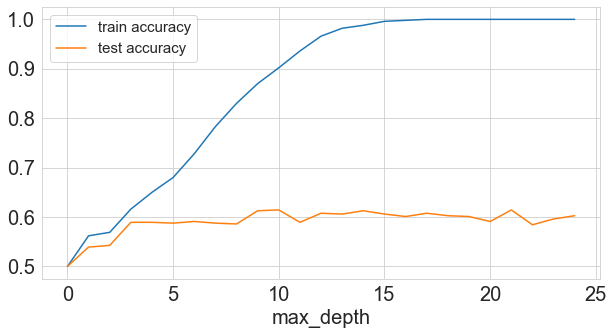

In [63]:
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')

plt.plot(train_accuracies, label='train accuracy')
plt.plot(test_accuracies, label='test accuracy')

plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel('max_depth', size=20)
plt.ylable('accuracy', size=20)
plt.show()

### KFOLD

In [64]:
import pandas as pd
from sklearn import model_selection

In [65]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,0
1,8.9,0.595,0.41,7.90,0.086,30.0,109.0,0.99980,3.27,0.57,9.3,2
2,6.9,0.580,0.20,1.75,0.058,8.0,22.0,0.99322,3.38,0.49,11.7,2
3,7.1,0.340,0.28,2.00,0.082,31.0,68.0,0.99694,3.45,0.48,9.4,2
4,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,2


In [66]:
df.shape

(1599, 12)

In [67]:
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)

In [68]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,2,-1
1,7.7,0.60,0.06,2.0,0.079,19.0,41.0,0.99697,3.39,0.62,10.1,3,-1
2,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,4,-1
3,8.1,0.33,0.44,1.5,0.042,6.0,12.0,0.99542,3.35,0.61,10.7,2,-1
4,8.9,0.50,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1,3,-1


In [69]:
kf = model_selection.KFold(n_splits=5)

In [71]:
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [72]:
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold

In [73]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,2,0
1,7.7,0.60,0.06,2.0,0.079,19.0,41.0,0.99697,3.39,0.62,10.1,3,0
2,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,4,0
3,8.1,0.33,0.44,1.5,0.042,6.0,12.0,0.99542,3.35,0.61,10.7,2,0
4,8.9,0.50,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1,3,0


## stratified KFOLD

In [75]:
import pandas as pd
from sklearn import model_selection

In [76]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,2,0
1,7.7,0.60,0.06,2.0,0.079,19.0,41.0,0.99697,3.39,0.62,10.1,3,0
2,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,4,0
3,8.1,0.33,0.44,1.5,0.042,6.0,12.0,0.99542,3.35,0.61,10.7,2,0
4,8.9,0.50,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1,3,0


In [79]:
df.quality.value_counts(normalize=True).sort_values()

0    0.006254
5    0.011257
1    0.033146
4    0.124453
3    0.398999
2    0.425891
Name: quality, dtype: float64

In [80]:
df['kfold'] = -1

In [81]:
df = df.sample(frac=1).reset_index(drop=True)
y = df.quality.values

In [82]:
kf = model_selection.StratifiedKFold(n_splits=5)

In [83]:
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f

In [90]:
df.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
1027,7.8,0.56,0.19,1.8,0.104,12.0,47.0,0.99640,3.19,0.93,9.5,2,3
373,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9,3,1
194,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,4,0
1258,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0,2,4
1366,9.0,0.45,0.49,2.6,0.084,21.0,75.0,0.99870,3.35,0.57,9.7,2,4


In [91]:
# let's have a look at the distribution

Text(0, 0.5, 'count')

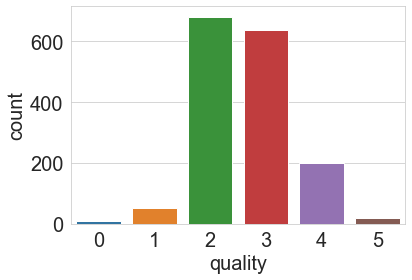

In [92]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)

In [ ]:

## 


## Application stratified k-fold to a sample regression datase 

In [93]:
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn import datasets

In [94]:
kf = model_selection.StratifiedKFold(n_splits=5)

def create_folds(data):
    data['kfold'] = -1
    data = data.sample(frac=1).reset_index(drop=True)
    num_bins = int(np.floor(1 + np.log2(len(data))))
    
    data.loc[:, 'bins'] = pd.cut(
        data['target'], bins=num_bins, labels=False
    )
    
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
        
    data = data.drop('bins', axis=1)
    
    return data

In [95]:
X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1
)

In [96]:
df = pd.DataFrame(
    X,
    columns=[f'f_{i}' for i in range(X.shape[1])]
)

In [97]:
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99
0,-0.782700,1.358249,2.240263,1.257244,0.262487,-0.903535,-0.024903,0.388091,-1.226898,1.079117,...,-0.307648,-0.444668,0.510644,0.438877,0.283013,0.387712,1.351598,0.301882,1.465834,1.035491
1,0.786865,0.786973,-0.259329,0.593108,0.142343,0.916533,-0.566182,0.109992,-1.087092,1.248736,...,-0.926293,-0.210953,-0.287573,0.782689,0.142271,-0.095198,0.958931,0.184180,0.188824,-1.271456
2,0.778602,-0.645844,0.316134,1.994348,0.996040,-0.063594,-0.242264,1.093403,-0.903984,0.272176,...,1.203592,-0.273564,1.135584,-0.087785,1.668966,1.570018,-0.117037,0.068999,0.095071,0.676012
3,0.668633,-0.554333,-0.852783,0.235948,-1.795583,-0.401869,0.983259,-1.591011,-0.331005,-0.488336,...,1.208471,0.643923,0.840424,-0.344398,-1.326439,1.627693,0.421228,-2.169513,0.066909,0.624919
4,0.323366,1.166251,-0.076026,1.094302,-0.677262,-0.429623,0.482508,-0.039190,-0.237220,-0.064552,...,-0.679139,0.333694,-1.619805,-0.928962,0.465605,0.005876,-1.049680,-0.379348,0.324224,-1.662210


In [98]:
df.loc[:, 'target'] = y
df = create_folds(df)

/Users/iliaozhmegov/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [99]:
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-0.690223,-1.072426,0.209993,1.275961,0.190599,-0.563052,0.126255,-0.616685,-0.198864,-0.134141,...,0.326509,-0.674053,-0.762775,1.295082,-0.390325,0.748908,1.589632,-1.232093,-174.081870,0
1,-0.159609,-0.232807,1.531734,1.434676,-0.307360,0.094498,0.621403,-1.029152,-0.932219,1.447624,...,0.680698,0.679320,-0.762910,2.225374,1.910693,-0.145900,-2.964609,-0.129353,-149.804768,0
2,0.819721,-1.319117,-1.542068,-0.801557,-0.887815,-0.411488,-0.983833,-0.136591,0.832673,-0.046675,...,0.974342,0.761873,-0.172227,-1.348642,-0.140389,0.822456,-0.152422,-0.070123,271.090531,0
3,-0.127126,-0.240917,-0.011009,-1.724970,0.098668,0.477358,0.897585,-0.035631,-1.084546,0.034663,...,1.483469,1.906944,1.088913,0.412972,-0.417392,-1.087241,0.078863,3.015139,182.183885,0
4,-0.694391,-0.731681,-0.738089,1.651260,0.772388,1.017161,1.110104,1.058724,-0.662939,-0.041095,...,0.060067,0.580225,0.023643,0.448287,0.283715,0.123247,-0.980874,-0.546720,7.365238,0
